# 1.Executive Summary

## Research Topic:

### Customer Segmentation on basis of Demographical values

## Research Domain:
### The domain of this research includes the economics and business. The dataset is clusterd with an aim to segment the customers of automobile market based on different factors like age,occupation and much more.

## Research Question:
### From the dataset how many automobile customers can be segmented into difffernt clusters?

## Research Hypothesis:
### There are approximately 2 clusters of automobile customers.

## Conclusion:
### So there are more than two clusteres in the dataset

# 2.1 Importing the Libraries:

In [39]:
# importing required libraries
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 2.2 Loading the Dataset

In [78]:
data=pd.read_csv("train-set.csv")

temp_data=data.copy()
data

CustomerID  Gender Married  Age Graduated     Profession  \
0         462809    Male      No   22        No     Healthcare   
1         462643  Female     Yes   38       Yes       Engineer   
2         466315  Female     Yes   67       Yes       Engineer   
3         461735    Male     Yes   67       Yes         Lawyer   
4         462669  Female     Yes   40       Yes  Entertainment   
...          ...     ...     ...  ...       ...            ...   
8063      464018    Male      No   22        No            NaN   
8064      464685    Male      No   35        No      Executive   
8065      465406  Female      No   33       Yes     Healthcare   
8066      467299  Female      No   27       Yes     Healthcare   
8067      461879    Male     Yes   37       Yes      Executive   

      WorkExperience SpendingScore  FamilySize    Category Segmentation  
0                1.0           Low         4.0  Category 4            D  
1                NaN       Average         3.0  Category 4            A  
2                1.0           Low         1.0  Category 6            B  
3                0.0          High         2.0  Category 6            B  
4                NaN          High         6.0  Category 6            A  
...              ...           ...         ...         ...          ...  
8063             0.0           Low         7.0  Category 1            D  
8064             3.0           Low         4.0  Category 4            D  
8065             1.0           Low         1.0  Category 6            D  
8066             1.0           Low         4.0  Category 6            B  
8067             0.0       Average         3.0  Category 4            B  

[8068 rows x 11 columns]

# Exploratory Data Analysis


### Shape of Dataset

In [79]:
data.shape

(8068, 11)

### Preview DataSet

In [43]:
data.head()

CustomerID  Gender Married  Age Graduated     Profession  WorkExperience  \
0      462809    Male      No   22        No     Healthcare             1.0   
1      462643  Female     Yes   38       Yes       Engineer             NaN   
2      466315  Female     Yes   67       Yes       Engineer             1.0   
3      461735    Male     Yes   67       Yes         Lawyer             0.0   
4      462669  Female     Yes   40       Yes  Entertainment             NaN   

  SpendingScore  FamilySize    Category Segmentation  
0           Low         4.0  Category 4            D  
1       Average         3.0  Category 4            A  
2           Low         1.0  Category 6            B  
3          High         2.0  Category 6            B  
4          High         6.0  Category 6            A

### Summary of Data

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      8068 non-null   int64  
 1   Gender          8068 non-null   object 
 2   Married         7928 non-null   object 
 3   Age             8068 non-null   int64  
 4   Graduated       7990 non-null   object 
 5   Profession      7944 non-null   object 
 6   WorkExperience  7239 non-null   float64
 7   SpendingScore   8068 non-null   object 
 8   FamilySize      7733 non-null   float64
 9   Category        7992 non-null   object 
 10  Segmentation    8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


### Check for missing values in dataset

In [45]:
data.isnull()

CustomerID  Gender  Married    Age  Graduated  Profession  \
0          False   False    False  False      False       False   
1          False   False    False  False      False       False   
2          False   False    False  False      False       False   
3          False   False    False  False      False       False   
4          False   False    False  False      False       False   
...          ...     ...      ...    ...        ...         ...   
8063       False   False    False  False      False        True   
8064       False   False    False  False      False       False   
8065       False   False    False  False      False       False   
8066       False   False    False  False      False       False   
8067       False   False    False  False      False       False   

      WorkExperience  SpendingScore  FamilySize  Category  Segmentation  
0              False          False       False     False         False  
1               True          False       False     False         False  
2              False          False       False     False         False  
3              False          False       False     False         False  
4               True          False       False     False         False  
...              ...            ...         ...       ...           ...  
8063           False          False       False     False         False  
8064           False          False       False     False         False  
8065           False          False       False     False         False  
8066           False          False       False     False         False  
8067           False          False       False     False         False  

[8068 rows x 11 columns]

### View the statistical summary of numerical variables

In [47]:
data.describe()

CustomerID          Age  WorkExperience   FamilySize
count    8068.000000  8068.000000     7239.000000  7733.000000
mean   463479.214551    43.466906        2.641663     2.850123
std      2595.381232    16.711696        3.406763     1.531413
min    458982.000000    18.000000        0.000000     1.000000
25%    461240.750000    30.000000        0.000000     2.000000
50%    463472.500000    40.000000        1.000000     3.000000
75%    465744.250000    53.000000        4.000000     4.000000
max    467974.000000    89.000000       14.000000     9.000000

## Checking  Non finite Values

In [80]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN

CustomerID  Gender Married  Age Graduated     Profession  \
1         462643  Female     Yes   38       Yes       Engineer   
4         462669  Female     Yes   40       Yes  Entertainment   
12        461230  Female      No   19        No      Executive   
13        459573    Male     Yes   70        No         Lawyer   
24        461021  Female     NaN   58        No      Executive   
...          ...     ...     ...  ...       ...            ...   
8040      467165  Female      No   25        No      Homemaker   
8044      466997  Female     NaN   50        No       Engineer   
8047      462396    Male     Yes   50       Yes         Doctor   
8049      461292  Female     Yes   81        No         Lawyer   
8063      464018    Male      No   22        No            NaN   

      WorkExperience SpendingScore  FamilySize    Category Segmentation  
1                NaN       Average         3.0  Category 4            A  
4                NaN          High         6.0  Category 6            A  
12               0.0           Low         NaN  Category 3            D  
13               NaN           Low         1.0  Category 6            A  
24               1.0       Average         3.0  Category 3            B  
...              ...           ...         ...         ...          ...  
8040             NaN           Low         1.0  Category 6            D  
8044             1.0           Low         2.0  Category 6            D  
8047             NaN       Average         2.0  Category 6            C  
8049             NaN          High         2.0  Category 3            D  
8063             0.0           Low         7.0  Category 1            D  

[1403 rows x 11 columns]

### We got 403 rows without data

In [113]:
data = data.fillna(0)

In [114]:
data.head()

CustomerID  Gender  Married  Age  Graduated  Profession  WorkExperience  \
0      462809       0        0   22          0           0             1.0   
1      462643       1        1   38          1           1             0.0   
2      466315       1        1   67          1           1             1.0   
3      461735       0        1   67          1           2             0.0   
4      462669       1        1   40          1           3             0.0   

   SpendingScore  FamilySize  Category Segmentation  
0              0         4.0         0            D  
1              1         3.0         0            A  
2              0         1.0         1            B  
3              2         2.0         1            B  
4              2         6.0         1            A

## Converting Ctaegorical Data into integers

In [115]:
data["WorkExperience"] = data["WorkExperience"].replace("Unknown",data["WorkExperience"].mode()[0])
data["FamilySize"] = data["FamilySize"].replace("Unknown",data["FamilySize"].mode()[0])

In [116]:
data["Gender"] = pd.factorize(data["Gender"])[0]
data["Married"] = pd.factorize(data["Married"])[0]
data["Graduated"] = pd.factorize(data["Graduated"])[0]
data["Profession"] = pd.factorize(data["Profession"])[0]
data["SpendingScore"] = pd.factorize(data["SpendingScore"])[0]
data["Category"] = pd.factorize(data["Category"])[0]
data.head()

CustomerID  Gender  Married  Age  Graduated  Profession  WorkExperience  \
0      462809       0        0   22          0           0             1.0   
1      462643       1        1   38          1           1             0.0   
2      466315       1        1   67          1           1             1.0   
3      461735       0        1   67          1           2             0.0   
4      462669       1        1   40          1           3             0.0   

   SpendingScore  FamilySize  Category Segmentation  
0              0         4.0         0            D  
1              1         3.0         0            A  
2              0         1.0         1            B  
3              2         2.0         1            B  
4              2         6.0         1            A

## Normalizing the Data

### Applying min max normalization
### Removing unwanted columns


In [117]:
scaler_obj = MinMaxScaler(feature_range=(0, 1))
normed = scaler_obj.fit_transform(data.copy().drop(columns=["CustomerID", "Segmentation"]))
df_normed = pd.DataFrame(data=normed, columns=data.columns[1:-1])
df_normed.head()

Gender  Married       Age  Graduated  Profession  WorkExperience  \
0     0.0      0.0  0.056338        0.0    0.000000        0.071429   
1     1.0      0.5  0.281690        0.5    0.111111        0.000000   
2     1.0      0.5  0.690141        0.5    0.111111        0.071429   
3     0.0      0.5  0.690141        0.5    0.222222        0.000000   
4     1.0      0.5  0.309859        0.5    0.333333        0.000000   

   SpendingScore  FamilySize  Category  
0            0.0    0.444444  0.000000  
1            0.5    0.333333  0.000000  
2            0.0    0.111111  0.142857  
3            1.0    0.222222  0.142857  
4            1.0    0.666667  0.142857

### Applying K means Clustering


### Setting up the k value equal to unique values in segmentation feature

In [118]:
k=len(temp_data['Segmentation'].unique())
k


4

In [119]:
kmeans = KMeans(n_clusters=k, random_state=0, max_iter=100, n_init=10, verbose=False)

# fit and predict labels

labels = kmeans.fit_predict(df_normed)
print("- labels = ", labels)

# count labels
count_labels = np.bincount(labels)
print("- count_labels = ", count_labels)

# find centroids
centroids = kmeans.cluster_centers_
print("- centroids.shape = ", centroids.shape)

- labels =  [3 1 2 ... 2 2 0]
- count_labels =  [1872 1341 2310 2545]
- centroids.shape =  (4, 9)


### Visualizing the Kmeans

In [120]:
cols = df_normed.columns[:-1]
df_res = df_normed[cols]
# add result labels
df_res["Cluster"] = labels
# insert "CustomerID" for easier understanding
df_res.insert(0, "CustomerID", data["CustomerID"])
# check the results
df_res.head()


CustomerID  Gender  Married       Age  Graduated  Profession  \
0      462809     0.0      0.0  0.056338        0.0    0.000000   
1      462643     1.0      0.5  0.281690        0.5    0.111111   
2      466315     1.0      0.5  0.690141        0.5    0.111111   
3      461735     0.0      0.5  0.690141        0.5    0.222222   
4      462669     1.0      0.5  0.309859        0.5    0.333333   

   WorkExperience  SpendingScore  FamilySize  Cluster  
0        0.071429            0.0    0.444444        3  
1        0.000000            0.5    0.333333        1  
2        0.071429            0.0    0.111111        2  
3        0.000000            1.0    0.222222        0  
4        0.000000            1.0    0.666667        1

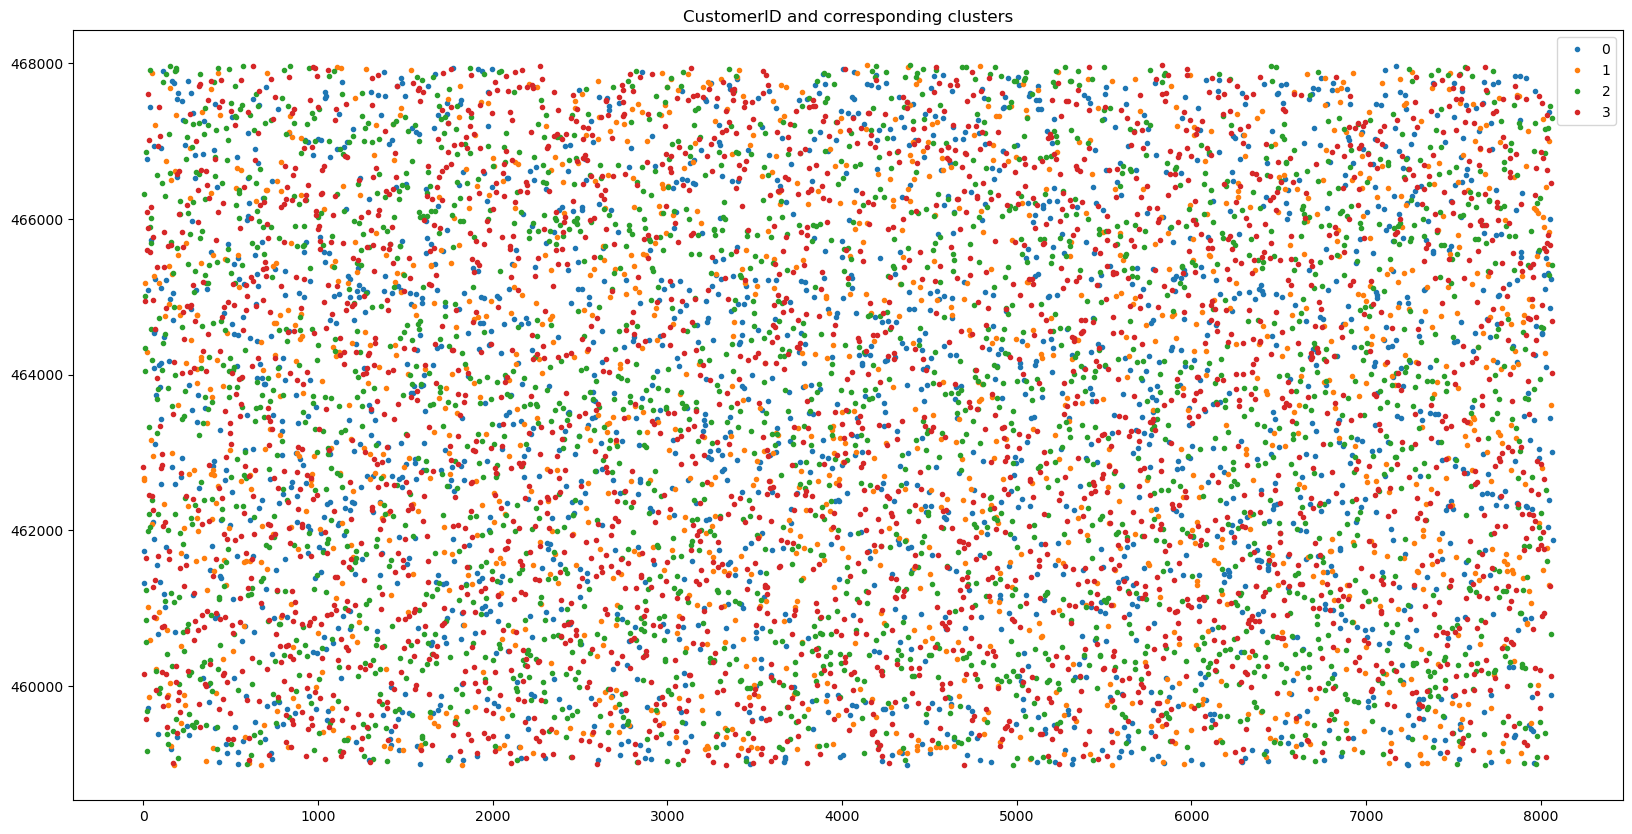

In [121]:
labels = np.unique(labels)
plt.figure(figsize=(20,10))
for i in labels:
    mask = (df_res["Cluster"] == i)
    plt.plot(df_res[mask]["CustomerID"], ".", label = i)
plt.title('CustomerID and corresponding clusters')
plt.legend()
plt.show()

## The cluster made due to large number of features in the dataset
## Conclusion:
## Different Colors indicate that there are more than two clusters in the dataset

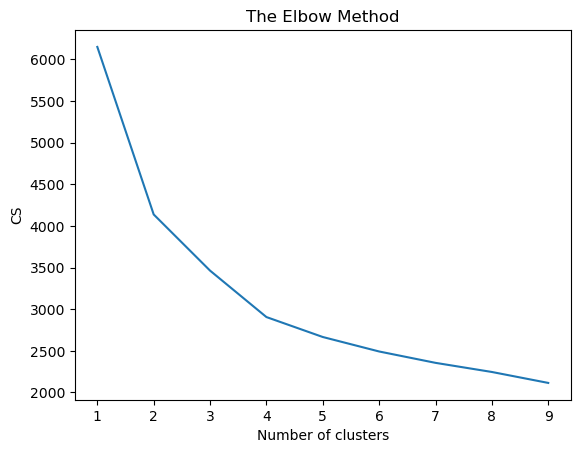

In [122]:
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_normed)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### The optimum number of k values is 4